# Estimation and Hypothesis Testing

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.2     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
options(repr.plot.width=4, repr.plot.height=3)

## Set random number seed for reproucibility

In [3]:
set.seed(42)

## Functions around probability distributions

Random numbers

In [4]:
rnorm(5)

[1]  1.3709584 -0.5646982  0.3631284  0.6328626  0.4042683

PDF

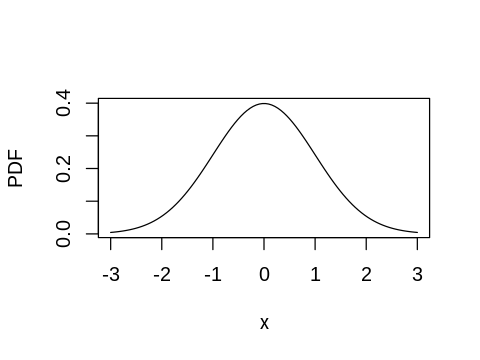

In [5]:
x <- seq(-3, 3, length.out = 100)
plot(x, dnorm(x), type="l", ylab="PDF")

CDF 

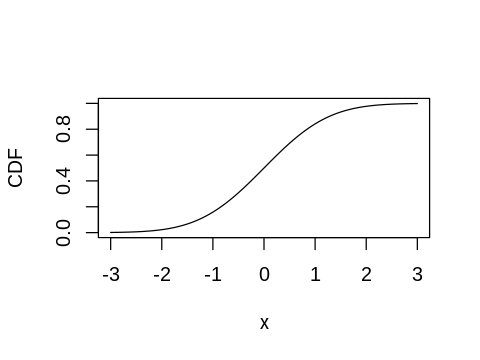

In [6]:
x <- seq(-3, 3, length.out = 100)
plot(x, pnorm(x), type="l", ylab="CDF")

Quantiles (inverse CDF)

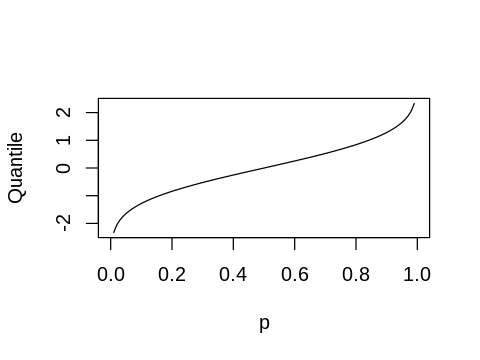

In [7]:
p = seq(0, 1, length.out = 101)
plot(p, qnorm(p), type="l", ylab="Quantile")

## Point estimates

In [8]:
x <- rnorm(10)

In [9]:
x

[1] -0.10612452  1.51152200 -0.09465904  2.01842371 -0.06271410  1.30486965
 [7]  2.28664539 -1.38886070 -0.27878877 -0.13332134

### Mean

Manual calculation

In [10]:
sum(x)/length(x)

[1] 0.5056992

Using built-in function

In [11]:
mean(x)

[1] 0.5056992

### Median

Manual calculation

In [13]:
x_sorted <- sort(x)

In [14]:
length(x)

[1] 10

Since there are an even number of observations, we need the average of the middle two data poitns

In [15]:
sum(x_sorted[5:6])/2

[1] -0.07868657

Using built-in function

In [16]:
median(x)

[1] -0.07868657

### Quantiles

The mean is just the $50^{th}$ percentile. We can use R to get any percentile we like.

In [17]:
quantile(x, 0.5)

50% 
-0.07868657

In [18]:
quantile(x, seq(0,1,length.out = 5))

0%         25%         50%         75%        100% 
-1.38886070 -0.12652213 -0.07868657  1.45985891  2.28664539

**Exercise**

Gene X is known to have a normal distribution with a mean of 100 units and a standard deviation of 15 units in the US population. With respect to this population,

- (1) What is the medan value for gene X?

- (2) What is the probability of finding a value of more than 130 for gene X if you pick a person at random?

- (3) If you measure gene X and find that it is in the 95th percentile for this population, what is the measured value?

- (4) Find answers to questions (1), (2) and (3) by simulating 1 million people sampled from the US population. Do they agree with the theoretical calculated values?

- (5) Plot the PDF of gene X using `ggplot2` for values between 50 and 150. Give it a title of `PDF of N(100, 15)`, a subtile of `I made this!`, and label the x-axis as `Gene X` and y-axis as `PDF`. Make the PDF blue, and fill the region under the curve blue with a transparency of 50%.

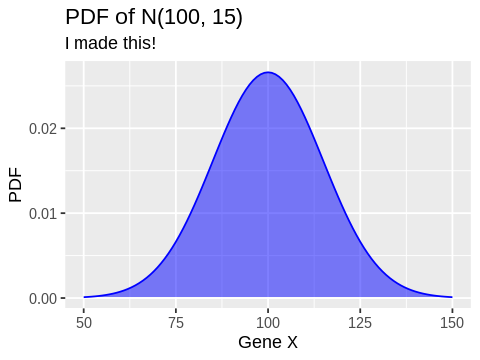

In [27]:
x <- 50:150
df <- data.frame(x=x, y=dnorm(x, m, s))
ggplot(df, aes(x=x, y=y)) +
geom_line(color='blue') +
geom_polygon(fill='blue', alpha=0.5) +
labs(title='PDF of N(100, 15)',
    subtitle='I made this!',
    x='Gene X',
    y='PDF')

## Interval estimates

### Confidence intervals

In [28]:
ci = 0.95

In [29]:
alpha = (1-ci)
n <- length(x)
m <- mean(x)
s <- sd(x)
se <- s/sqrt(n)
me <- qt(1-alpha/2, df=n-1) * se
c(m - me, m + me)

[1]  94.21578 105.78422

Note that confidence intervals get larger as the confidence required increases.

In [30]:
ci = 0.99

In [31]:
alpha = (1-ci)
n <- length(x)
m <- mean(x)
s <- sd(x)
se <- s/sqrt(n)
me <- qt(1-alpha/2, df=n-1) * se
c(m - me, m + me)

[1]  92.34428 107.65572

### Making a function

#### Review of R custom functions

In [31]:
f <- function(a, b=1) {
    a + b
}

In [32]:
f(2)

[1] 3

In [33]:
f(2,3)

[1] 5

In [34]:
f(b=4, a=1)

[1] 5

**Exercise**

Make a function called `conf` for calculating confidence intervals for the sample mean that takes two arguments 

- x is the vector of sample values
- ci is the confidence interval with a default of 0.95

The funciton should return a vector of two numbers indicating the lwoer and upper limeit of the confidence interval

Check that it gives the same answer as the example above.

### Coverage

In 1,000 experiments, we expect the true mean (0) to lie within the estimated 95% CIs 950 times.

In [34]:
n_expt <- 1000
n <- 10
cls <- t(replicate(n_expt, conf(rnorm(n))))

In [35]:
sum(cls[,1] < 0 & 0 < cls[,2])

[1] 960

Exercise: If we test 1,000,000 genes for differential expression, how many false positives would we expect if we set a significance level of 0.05?

## Hypothesis testing

### Binomial test

In [1]:
set.seed(123)

n = 50
tosses = sample(c('H', 'T'), n, replace=TRUE, prob=c(0.55, 0.45))
t = table(tosses)
t

tosses
 H  T 
27 23 

In [2]:
binom.test(table(tosses))


	Exact binomial test

data:  table(tosses)
number of successes = 27, number of trials = 50, p-value = 0.6718
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.3932420 0.6818508
sample estimates:
probability of success 
                  0.54 


In [3]:
set.seed(123)

n = 250
tosses = sample(c('H', 'T'), n, replace=TRUE, prob=c(0.55, 0.45))
t = table(tosses)
t

tosses
  H   T 
139 111 

In [4]:
binom.test(t)


	Exact binomial test

data:  t
number of successes = 139, number of trials = 250, p-value = 0.0875
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.4920569 0.6185995
sample estimates:
probability of success 
                 0.556 


#### What happens if we choose a one-sided test?

In [5]:
binom.test(t, alternative = "greater")


	Exact binomial test

data:  t
number of successes = 139, number of trials = 250, p-value = 0.04375
alternative hypothesis: true probability of success is greater than 0.5
95 percent confidence interval:
 0.5020197 1.0000000
sample estimates:
probability of success 
                 0.556 


In [6]:
binom.test(t, alternative = "less")


	Exact binomial test

data:  t
number of successes = 139, number of trials = 250, p-value = 0.9668
alternative hypothesis: true probability of success is less than 0.5
95 percent confidence interval:
 0.0000000 0.6089811
sample estimates:
probability of success 
                 0.556 


#### What happens if we change our null hypothesis?

In [7]:
binom.test(t, p = 0.55)


	Exact binomial test

data:  t
number of successes = 139, number of trials = 250, p-value = 0.8989
alternative hypothesis: true probability of success is not equal to 0.55
95 percent confidence interval:
 0.4920569 0.6185995
sample estimates:
probability of success 
                 0.556 


## Two-sample model

### Welch t-test

In [8]:
set.seed(123)

n <- 10
x1 <- rnorm(n, 0, 1)
x2 <- rnorm(n, 1, 1)

In [9]:
t.test(x1, x2)


	Welch Two Sample t-test

data:  x1 and x2
t = -2.5438, df = 17.872, p-value = 0.02044
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.0710488 -0.1969438
sample estimates:
 mean of x  mean of y 
0.07462564 1.20862196 


### Standard t-test

In [10]:
t.test(x1, x2, var.equal = TRUE)


	Two Sample t-test

data:  x1 and x2
t = -2.5438, df = 18, p-value = 0.02036
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.0705694 -0.1974232
sample estimates:
 mean of x  mean of y 
0.07462564 1.20862196 


### Power of t-test

In [13]:
d <- 1 # Effect size is ratio of difference in means to standard deviation
library(pwr)
pwr.t.test(d = d, sig.level = 0.05, power = 0.9)


     Two-sample t test power calculation 

              n = 22.02109
              d = 1
      sig.level = 0.05
          power = 0.9
    alternative = two.sided

NOTE: n is number in *each* group


#### Interpretation of the power calculaiton

If we did many experiments with `n=23` per group where the effect size is as specified and the test assumptions are valid, we expect that at least 90% of them will have a p-value less than the nominal significance level (0.05). If we used `n=22` we would expect that just under 90% of the experiments will have a p-value less than the nomial significance level (0.05).

In particular notet that about $1 - power$ of the experiments will fail to show a statistically significant p value even if the assumptions are met (false negative).

In [14]:
n_expts <- 10000
n <- 22
alpha = 0.05
sum(replicate(n_expts, t.test(rnorm(n, 0, 1), rnorm(n, 1, 1))$p.value) < alpha)/n_expts

[1] 0.901

In [15]:
n_expts <- 10000
n <- 23
alpha = 0.05
sum(replicate(n_expts, t.test(rnorm(n, 0, 1), rnorm(n, 1, 1))$p.value) < alpha)/n_expts

[1] 0.9125

#### Distribution of p-values under the null is uniform

That means that you expect $\alpha$ of the experiments to be false positives.

In [17]:
n_expt <- 10000
n <- 50
ps <- replicate(n_expts, t.test(rnorm(n), rnorm(n))$p.value)

In [18]:
sum(ps < alpha)/n_expts

[1] 0.0499

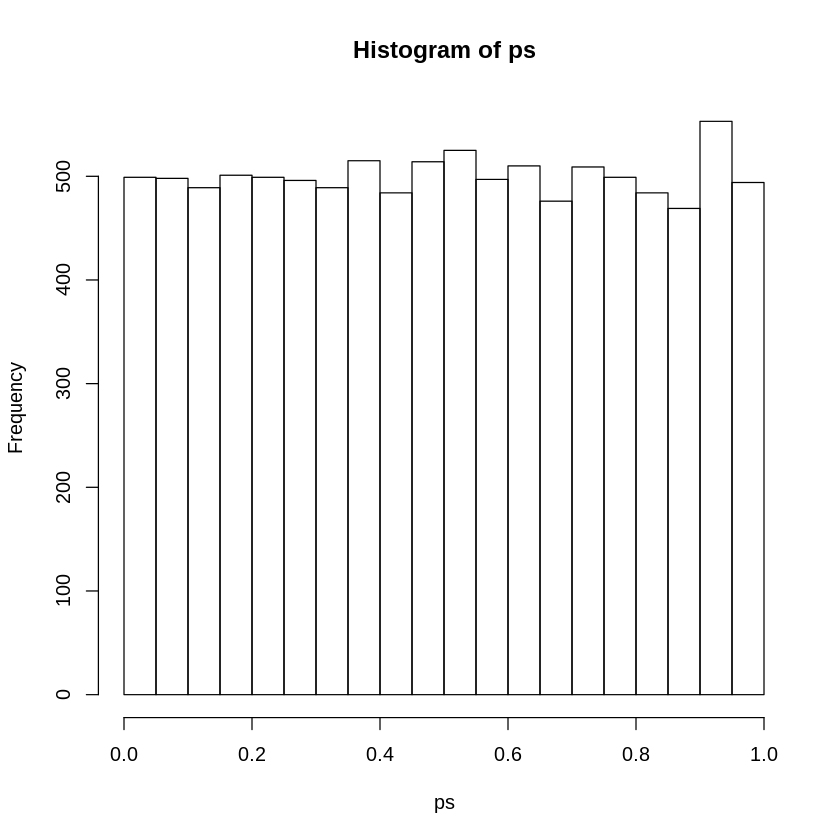

In [19]:
hist(ps)

### Paired and one-sample t-tests

A paired t-test is commonly used to evaluate if paired measurements (e..g. weight before and after a diet for the same person) has changed. The paired t-test is equivalent to a one-sample t-test  that compares the difference in measurements for the paired values with a fixed number (usually 0). 

In [20]:
x1 <- rnorm(10, 100, 15)
x2 <- rnorm(10, 100, 15)
delta <- x1 - x2

In [21]:
t.test(x1, x2, paired=TRUE)


	Paired t-test

data:  x1 and x2
t = 1.4344, df = 9, p-value = 0.1853
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.465412 19.942883
sample estimates:
mean of the differences 
               7.738736 


In [22]:
t.test(delta, mu=0)


	One Sample t-test

data:  delta
t = 1.4344, df = 9, p-value = 0.1853
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -4.465412 19.942883
sample estimates:
mean of x 
 7.738736 


**Exercise**

Suppose that the null hypothesis is that there is no difference in the paired measurements and the standard deviation of the difference is 2.

- Run a simulation for 100,000 experiments with `n=25` per experiment to show the distributon of the p values using a paired or one -sample t-test under the null.
- If the significance level is 0.05, how many false positive results were observed?